# Задание words2sentences  
***
Преобразование списка слов в текст, состоящий из предложений.  

Реализовать алгоритм на языке Python, который позволит создавать предложения из списка слов.  
В качестве исходных данных 3 файла со следующей структурой:  
<Начало слова, с> <Конец слова, с> <Слово> <Вероятность>.  

***
**Рассматриваю эту задачу как задачу кластеризации массива.**  
Импорт библиотек и файлов с данными
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import DistanceMetric
import numpy as np
import seaborn as sns

In [2]:
file_news = 'words/news.words'
file_news2 = 'words/news2.words'
file_speech = 'words/speech.words'

In [3]:
cols = ['start', 'end', 'word', 'prob']
news = pd.read_csv(file_news, sep = '\t', names = cols)
news2 = pd.read_csv(file_news2, sep = '\t', names = cols)
speech = pd.read_csv(file_speech, sep = '\t', names = cols)

***
Просмотр данных и добавление фич.
***

In [4]:
news.head(10)

,start,end,word,prob
0,0.66,0.78,с,0.98
1,0.78,1.14,4-ёх,1.00
2,1.14,1.56,столичных,1.00
3,1.56,2.04,вокзалов,1.00
4,2.04,2.34,начали,1.00
5,2.34,2.70,ходить,0.99
6,2.81,3.30,зимние,0.67
7,3.30,3.96,экспрессы,0.43
8,3.99,4.68,москвичей,0.99
9,4.68,5.28,приглашают,0.95


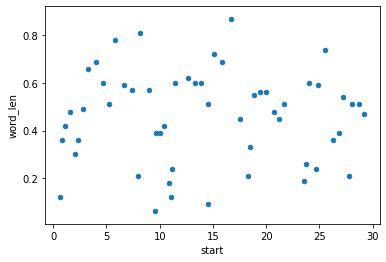

In [5]:
news['word_len'] = news.end - news.start
before = [0.0]
[before.append(round(news.start[i+1] - news.end[i], 2)) for i in range(news.shape[0] - 1)]
news['before'] = before
news['factor'] = news.before * news.prob
news.plot.scatter('start', 'word_len')
plt.show()

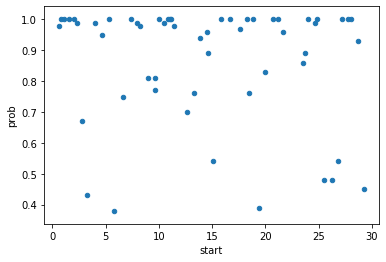

In [6]:
# поиск ярко выраженной визуально корреляции в данных 1
news.plot.scatter('start', 'prob')
plt.show()

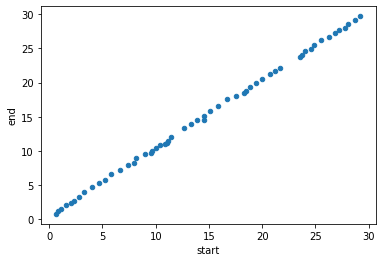

In [7]:
# поиск ярко выраженной визуально корреляции в данных 2
news.plot.scatter('start', 'end')
plt.show()

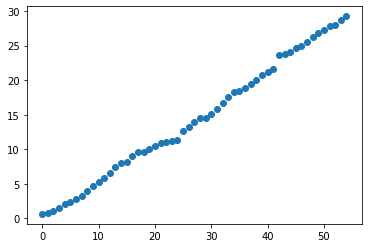

In [8]:
# поиск ярко выраженной визуально корреляции в данных 3
plt.scatter(range(news.shape[0]), news.start)
plt.show()

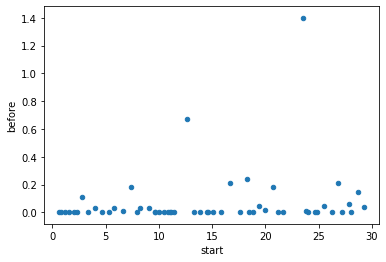

In [9]:
# поиск ярко выраженной визуально корреляции в данных 4
news.plot.scatter('start', 'before')
plt.show()

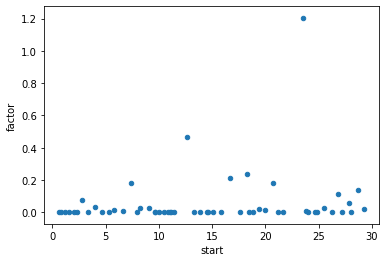

In [10]:
# поиск ярко выраженной визуально корреляции в данных 5
news.plot.scatter('start', 'factor')
plt.show()

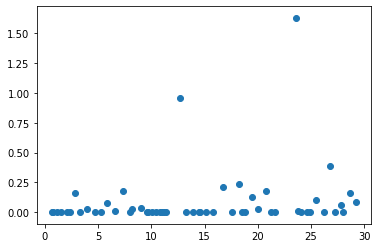

In [11]:
# поиск ярко выраженной визуально корреляции в данных 6
plt.scatter(news.start, news.before/news.prob)
plt.show()

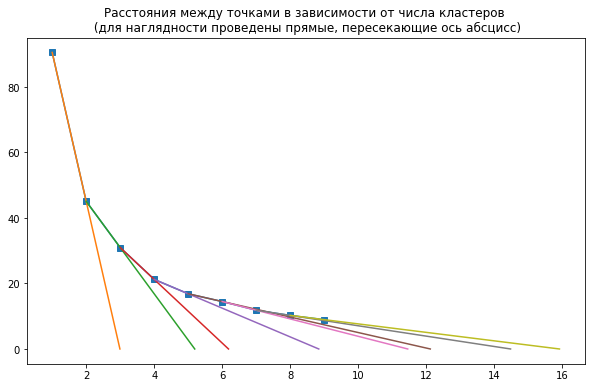

In [12]:
# построение кривой с целью оценки наиболее оптимального количества кластеров
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(news[['start','end', 'prob', 'factor']])
    inertia.append(np.sqrt(kmeans.inertia_))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 10), inertia, marker = 's')
for i in range(0, 8):
    plt.plot([i+1, ((0 - inertia[i])/(inertia[i+1] - inertia[i]))*1 + i+1], [inertia[i], 0])

plt.title('Расстояния между точками в зависимости от числа кластеров \n (для наглядности проведены прямые, пересекающие ось абсцисс)')
plt.show()

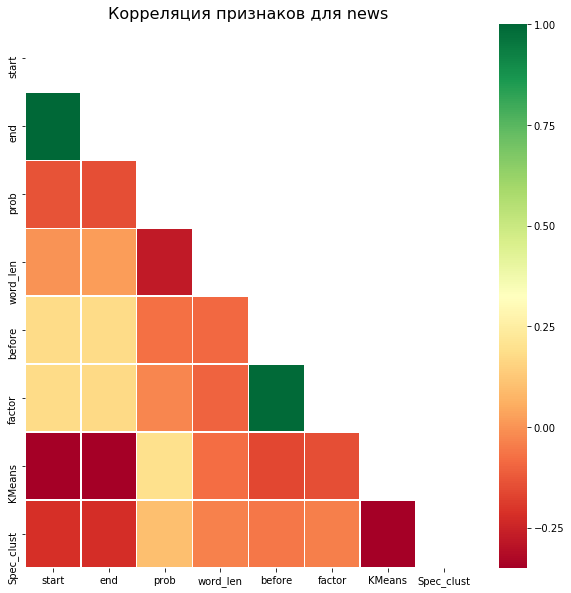

In [13]:
mean_words = 10
n_clstrs = int(news.shape[0]/mean_words) # временное значения количества кластеров
estimator = KMeans(n_clusters = n_clstrs)
y_pred = estimator.fit_predict(news[['start', 'end', 'prob']])
news['KMeans'] = estimator.labels_
estimator = SpectralClustering(n_clusters = n_clstrs)
y_pred = estimator.fit_predict(news[['start', 'end', 'prob']])
news['Spec_clust'] = estimator.labels_
corr = news.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
plt.title('Корреляция признаков для news', fontsize=16)
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

In [14]:
corr

,start,end,prob,word_len,before,factor,KMeans,Spec_clust
start,1.000000,0.999755,-0.139031,-0.001942,0.180309,0.178804,-0.348641,-0.217853
end,0.999755,1.000000,-0.145038,0.020214,0.178350,0.176584,-0.350261,-0.218579
prob,-0.139031,-0.145038,1.000000,-0.272403,-0.075029,-0.025462,0.193111,0.102383
word_len,-0.001942,0.020214,-0.272403,1.000000,-0.086746,-0.098579,-0.076293,-0.034769
before,0.180309,0.178350,-0.075029,-0.086746,1.000000,0.994243,-0.162168,-0.059804
factor,0.178804,0.176584,-0.025462,-0.098579,0.994243,1.000000,-0.146752,-0.042205
KMeans,-0.348641,-0.350261,0.193111,-0.076293,-0.162168,-0.146752,1.000000,-0.345649
Spec_clust,-0.217853,-0.218579,0.102383,-0.034769,-0.059804,-0.042205,-0.345649,1.000000


***
В результате беглого анализа данных становится очевидно, что наиболее влияющими на требуемый результат данными являются моменты начала и конца произнесения слова. Так как они между собой сильно коррелируют, то нет никакого смысла использовать их вместе.  
  
Фичи, полученные в попытке обогатить данные, приводят к не столь убедительным значениям с точки зрения корреляции.
  
Выбор начального количества кластеров крайне примерен, но можно объяснить простой логикой - общее число слов (55), делённое на 10 (среднее количество слов в предложении).


***
# NEWS  
Дополнение фичами, построение графика для выбора оптимального числа кластеров.
***

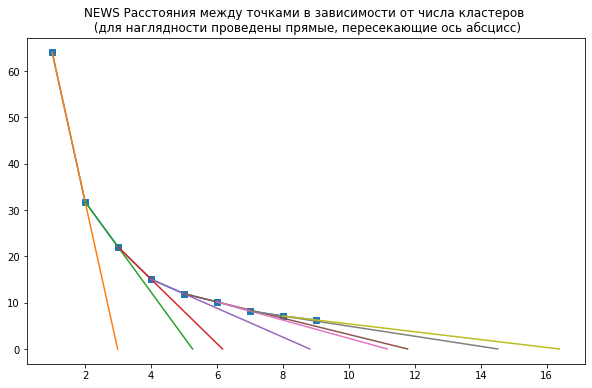

In [15]:
# начало работы с NEWS
X = news.copy()
X['word_len'] = X.end - X.start
before = [0.0]
[before.append(round(X.start[i+1] - X.end[i], 2)) for i in range(X.shape[0] - 1)]
X['before'] = before
inertia = []
max_k = 10
X_fit = X[['end']]
for k in range(1, max_k):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(X_fit)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k), inertia, marker = 's')
for i in range(0, max_k - 2):
    plt.plot([i+1, ((0 - inertia[i])/(inertia[i+1] - inertia[i]))*1 + i+1], [inertia[i], 0])
plt.title('NEWS Расстояния между точками в зависимости от числа кластеров \n (для наглядности проведены прямые, пересекающие ось абсцисс)')
plt.show()

***
С целью определения наиболее удачного количества кластеров не визуально, а математически, используется расчёт приращений расстояний (формально, аналог второй производной для поиска максимальной вогнутости).
***

In [16]:
# создание датафрейма с расстояниями между точками и их производных
inertia_df = pd.DataFrame(inertia, columns = ['inertia'])
inertia_df['num_clstrs'] = [i for i in range(1, inertia_df.shape[0] + 1)]
diff_inertia = []
for i in range(len(inertia) - 1):
    diff_inertia.append(inertia[i+1] - inertia[i])
diff_inertia.append(0.1)
inertia_df['diff'] = diff_inertia
diff_change = []
for i in range(len(diff_inertia) - 1):
    diff_change.append(diff_inertia[i+1]/diff_inertia[i])
diff_change.append(1)
inertia_df['diff_change'] = diff_change
inertia_df.drop([inertia_df.index[-1], inertia_df.index[-2]], inplace = True)
n_clstrs = int(inertia_df[inertia_df['diff_change'] < inertia_df['diff_change'].mean()].iloc[-1].num_clstrs)

***
Разделение на кластеры визуально по методу KMeans и спектральной кластеризации.
***

Число кластеров равно 6.


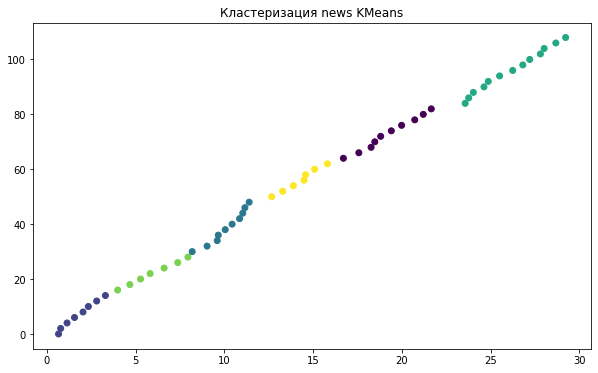

In [17]:
# KMeans кластеризация
estimator = KMeans(n_clusters = n_clstrs)
y_pred = estimator.fit_predict(X_fit)
X['KMeans'] = estimator.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X.start, [2*i for i in range(X.shape[0])], c=y_pred)
plt.title('Кластеризация news KMeans')
print('Число кластеров равно {}.'.format(n_clstrs))
plt.show()

Число кластеров равно 6.


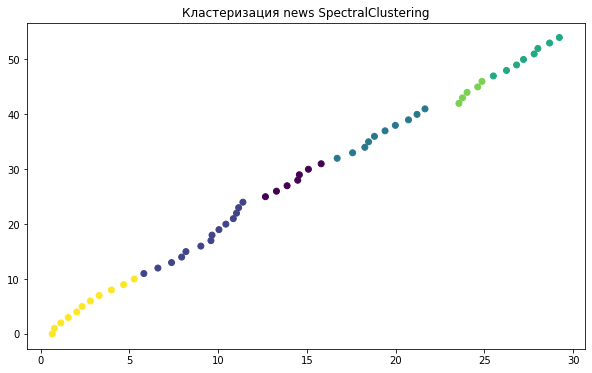

In [18]:
# Спектральная кластеризация
sp_cl = SpectralClustering(n_clusters = n_clstrs)
print('Число кластеров равно {}.'.format(n_clstrs))
y_pred = sp_cl.fit_predict(X_fit)
X['Spec_clust'] = sp_cl.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X.start, range(X.shape[0]), c=y_pred)
plt.title('Кластеризация news SpectralClustering')
plt.show()

In [19]:
print('KMeans')
sentence = [X.word[0].capitalize()]
phrase = []
for i in range(1, X.shape[0]):
    if X.KMeans[i] == X.KMeans[i-1]:
        sentence.append(X.word[i])
    else:
        sentence = ' '.join(word for word in sentence)
        phrase.append(sentence + '.')
        sentence = [X.word[i].capitalize()]
sentence = ' '.join(word for word in sentence)
phrase.append(sentence + '.')
phrase

KMeans


['С 4-ёх столичных вокзалов начали ходить зимние экспрессы.',
 'Москвичей приглашают посетить игрушечное царство прогуляться по.',
 'Подмосковному арбату и главное узнать где всё это вообще находится.',
 'Тематические электрички отправляются с курского казанского савёловского.',
 'Ярославского вокзала они завезут пассажиров в дмитров сергиев посад коломну.',
 'В пути туристов будут сопровождать профессиональные гиды которые расскажут об истории старинных городов.']

In [20]:
print('Spectral Clustering')
sentence = [X.word[0].capitalize()]
phrase = []
for i in range(1, X.shape[0]):
    if X.Spec_clust[i] == X.Spec_clust[i-1]:
        sentence.append(X.word[i])
    else:
        sentence = ' '.join(word for word in sentence)
        phrase.append(sentence + '.')
        sentence = [X.word[i].capitalize()]
sentence = ' '.join(word for word in sentence)
phrase.append(sentence + '.')
phrase

Spectral Clustering


['С 4-ёх столичных вокзалов начали ходить зимние экспрессы москвичей приглашают посетить.',
 'Игрушечное царство прогуляться по подмосковному арбату и главное узнать где всё это вообще находится.',
 'Тематические электрички отправляются с курского казанского савёловского.',
 'Ярославского вокзала они завезут пассажиров в дмитров сергиев посад коломну.',
 'В пути туристов будут сопровождать.',
 'Профессиональные гиды которые расскажут об истории старинных городов.']

***
## Оценка для news
Данная оценка довольно субъективна, однако, на мой взгляд, KMeans лучше справился с задачей.
***

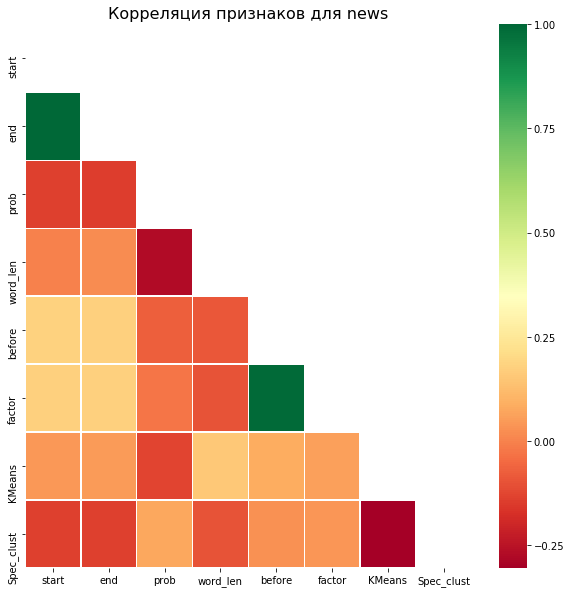

In [21]:
# график корреляций
corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
plt.title('Корреляция признаков для news', fontsize=16)
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

In [22]:
corr

,start,end,prob,word_len,before,factor,KMeans,Spec_clust
start,1.000000,0.999755,-0.139031,-0.001942,0.180309,0.178804,0.045963,-0.139347
end,0.999755,1.000000,-0.145038,0.020214,0.178350,0.176584,0.049409,-0.141451
prob,-0.139031,-0.145038,1.000000,-0.272403,-0.075029,-0.025462,-0.127045,0.076575
word_len,-0.001942,0.020214,-0.272403,1.000000,-0.086746,-0.098579,0.155925,-0.096252
before,0.180309,0.178350,-0.075029,-0.086746,1.000000,0.994243,0.083970,0.029469
factor,0.178804,0.176584,-0.025462,-0.098579,0.994243,1.000000,0.058060,0.037608
KMeans,0.045963,0.049409,-0.127045,0.155925,0.083970,0.058060,1.000000,-0.305269
Spec_clust,-0.139347,-0.141451,0.076575,-0.096252,0.029469,0.037608,-0.305269,1.000000


***
# NEWS 2  
Все операции абсолютно аналогичны случаю с News.
***

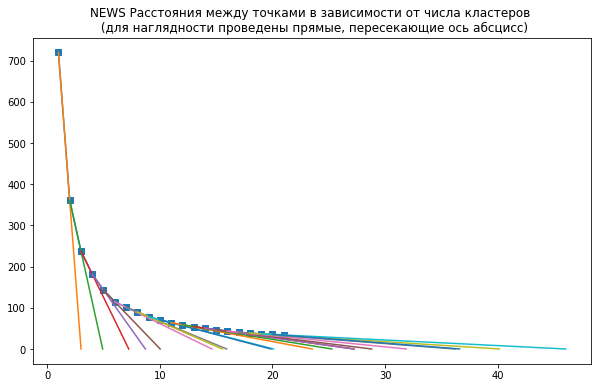

In [23]:
# начало работы с NEWS2
X = news2.copy()
X_fit = X[['end', 'prob']]
X['word_len'] = X.end - X.start
before = [0.0]
[before.append(round(X.start[i+1] - X.end[i], 2)) for i in range(X.shape[0] - 1)]
X['before'] = before
max_k = 22
inertia = []
for k in range(1, max_k):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(X_fit)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k), inertia, marker = 's')
for i in range(0, max_k - 2):
    plt.plot([i+1, ((0 - inertia[i])/(inertia[i+1] - inertia[i]))*1 + i+1], [inertia[i], 0])
plt.title('NEWS Расстояния между точками в зависимости от числа кластеров \n (для наглядности проведены прямые, пересекающие ось абсцисс)')
plt.show()

In [24]:
# создание датафрейма с расстояниями между точками и их производных
inertia_df = pd.DataFrame(inertia, columns = ['inertia'])
inertia_df['num_clstrs'] = [i for i in range(inertia_df.shape[0])]
diff_inertia = []
for i in range(len(inertia) - 1):
    diff_inertia.append(inertia[i+1] - inertia[i])
diff_inertia.append(0.1)
inertia_df['diff'] = diff_inertia
diff_change = []
for i in range(len(diff_inertia) - 1):
    diff_change.append(diff_inertia[i+1]/diff_inertia[i])
diff_change.append(1)
inertia_df['diff_change'] = diff_change
inertia_df.drop([inertia_df.index[-1], inertia_df.index[-2]], inplace = True)
n_clstrs = int(inertia_df[inertia_df['diff_change'] < inertia_df['diff_change'].mean()].iloc[-1].num_clstrs)

Число кластеров равно 17.


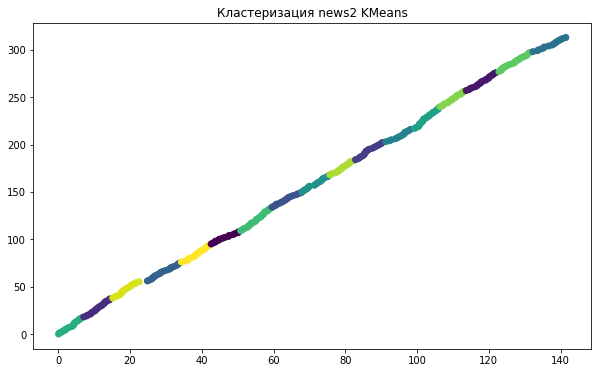

In [25]:
# KMeans кластеризация
estimator = KMeans(n_clusters = n_clstrs)
print('Число кластеров равно {}.'.format(n_clstrs))
y_pred = estimator.fit_predict(X_fit)
X['KMeans'] = estimator.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X.start, range(X.shape[0]), c=y_pred)
plt.title('Кластеризация news2 KMeans')
plt.show()

Число кластеров равно 17.


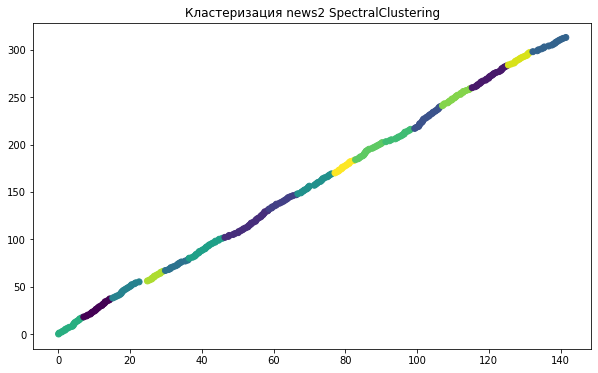

In [26]:
# Спектральная кластеризация
sp_cl = SpectralClustering(n_clusters = n_clstrs)
print('Число кластеров равно {}.'.format(n_clstrs))
y_pred = sp_cl.fit_predict(X_fit)
X['Spec_clust'] = sp_cl.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X.start, range(X.shape[0]), c=y_pred)
plt.title('Кластеризация news2 SpectralClustering')
plt.show()

In [27]:
print('KMeans')
sentence = [X.word[0].capitalize()]
phrase = []
for i in range(1, X.shape[0]):
    if X.KMeans[i] == X.KMeans[i-1]:
        sentence.append(X.word[i])
    else:
        sentence = ' '.join(word for word in sentence)
        phrase.append(sentence + '.')
        sentence = [X.word[i].capitalize()]
sentence = ' '.join(word for word in sentence)
phrase.append(sentence + '.')
phrase

KMeans


['В пентагоне сегодня жаловались на российский истребитель су-27 который в небе над чёрным морем пошёл на перехват самолёта.',
 'Разведчика ввс сша наши военный специалисты полагают что американцы могли собирать сведения о системе пво в крыму однако не получилось.',
 'Виртуозной манёвр российского лётчика привёл к тому что шпионы временно потеряли способность управлять своим самолётом стас редикульцев подробностями.',
 'Заявление пентагона об инциденте с американским самолётам шпионом и российским истребителем су-27 читаешь как голливудский сценарий где-то над чёрным морем.',
 '25-го января а борт 135 выполнявший полёт по обычному маршруту в международном воздушном пространстве над чёрным морем был перехвачен.',
 'Российским су-27 в небезопасной и непрофессиональной манере небезопасное и непрофессиональное манера традиционное для пентагона.',
 'Оценка наш истребитель приблизился на 6 метров к американскому самолёту с этим сделал резкий разворот с креном и ушёл в сторону по данным знако

In [28]:
print('Spectral Clustering')
sentence = [X.word[0].capitalize()]
phrase = []
for i in range(1, X.shape[0]):
    if X.Spec_clust[i] == X.Spec_clust[i-1]:
        sentence.append(X.word[i])
    else:
        sentence = ' '.join(word for word in sentence)
        phrase.append(sentence + '.')
        sentence = [X.word[i].capitalize()]
sentence = ' '.join(word for word in sentence)
phrase.append(sentence + '.')
phrase

Spectral Clustering


['В пентагоне сегодня жаловались на российский истребитель су-27 который в небе над чёрным морем пошёл на перехват самолёта.',
 'Разведчика ввс сша наши военный специалисты полагают что американцы могли собирать сведения о системе пво в крыму однако не получилось.',
 'Виртуозной манёвр российского лётчика привёл к тому что шпионы временно потеряли способность управлять своим самолётом стас редикульцев подробностями.',
 'Заявление пентагона об инциденте с американским самолётам шпионом и российским истребителем.',
 'Су-27 читаешь как голливудский сценарий где-то над чёрным морем 25-го января а борт.',
 '135 выполнявший полёт по обычному маршруту в международном воздушном пространстве над чёрным морем был перехвачен российским су-27 в небезопасной и непрофессиональной манере.',
 'Небезопасное и непрофессиональное манера традиционное для пентагона оценка наш истребитель приблизился на 6 метров к американскому самолёту с этим сделал резкий разворот с креном и ушёл в сторону по данным.',
 '

***
## Оценка для news2
В данном случае оценка ещё более субъективна. Оба использованных алгоритма кластеризации не идеально разбили массив слов на предложения, но в оправдание можно сказать, что текст и разметка по времени также представлены в крайне смешанном виде. Также, это единственный случай, когда также использовалась фича 'Вероятность' (так как её использование в прошлых вариантах больше портило картину).

***
# SPEECH  
Все операции аналогичны NEWS и NEWS2 (кроме финального блока).
***

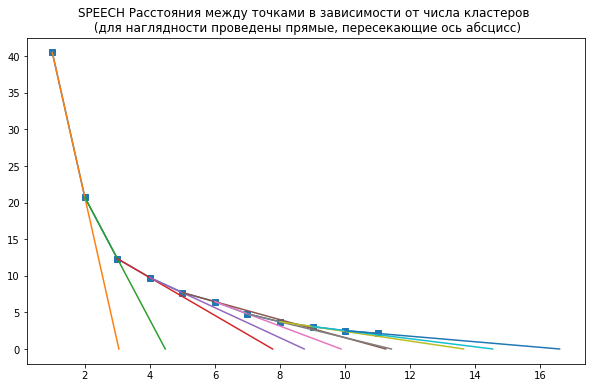

In [29]:
# Начало работы с SPEECH
X = speech.copy()
max_k = 12
X_fit = X[['end']]
X['word_len'] = X.end - X.start
before = [0.0]
[before.append(round(X.start[i+1] - X.end[i], 2)) for i in range(X.shape[0] - 1)]
X['before'] = before
inertia = []
for k in range(1, max_k):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(X_fit)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k), inertia, marker = 's')
for i in range(0, max_k - 2):
    plt.plot([i+1, ((0 - inertia[i])/(inertia[i+1] - inertia[i]))*1 + i+1], [inertia[i], 0])
plt.title('SPEECH Расстояния между точками в зависимости от числа кластеров \n (для наглядности проведены прямые, пересекающие ось абсцисс)')
plt.show()

In [30]:
# создание датафрейма с расстояниями между точками и их производных
inertia_df = pd.DataFrame(inertia, columns = ['inertia'])
inertia_df['num_clstrs'] = [i for i in range(1, inertia_df.shape[0] + 1)]
diff_inertia = []
for i in range(len(inertia) - 1):
    diff_inertia.append(inertia[i+1] - inertia[i])
diff_inertia.append(0.1)
inertia_df['diff'] = diff_inertia
diff_change = []
for i in range(len(diff_inertia) - 1):
    diff_change.append(diff_inertia[i+1]/diff_inertia[i])
diff_change.append(1)
inertia_df['diff_change'] = diff_change
inertia_df.drop([inertia_df.index[-1], inertia_df.index[-2]], inplace = True)
n_clstrs = int(inertia_df[inertia_df['diff_change'] < inertia_df['diff_change'].mean()].iloc[-1].num_clstrs)

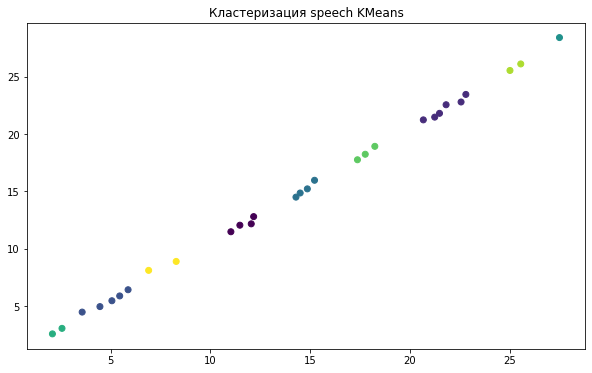

KMeans


In [31]:
# KMeans кластеризация
estimator = KMeans(n_clusters = n_clstrs)
y_pred = estimator.fit_predict(X_fit)
X['KMeans'] = estimator.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X.start, X.end, c=y_pred)
plt.title('Кластеризация speech KMeans')
plt.show()
print('KMeans')

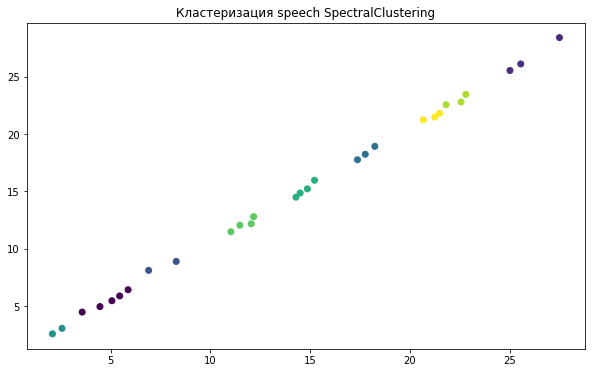

In [32]:
# Спектральная кластеризация
sp_cl = SpectralClustering(n_clusters = n_clstrs)
y_pred = sp_cl.fit_predict(X_fit)
X['Spec_clust'] = sp_cl.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X.start, X.end, c=y_pred)
plt.title('Кластеризация speech SpectralClustering')
plt.show()

In [33]:
print('KMeans')
sentence = [X.word[0].capitalize()]
phrase = []
for i in range(1, X.shape[0]):
    if X.KMeans[i] == X.KMeans[i-1]:
        sentence.append(X.word[i])
    else:
        sentence = ' '.join(word for word in sentence)
        phrase.append(sentence + '.')
        sentence = [X.word[i].capitalize()]
sentence = ' '.join(word for word in sentence)
phrase.append(sentence + '.')
phrase

KMeans


['Доброе утро.',
 'Московское время 8 часов утра.',
 '28 минут.',
 'Я собираюсь на работу.',
 'На улице сегодня обещают.',
 'Очень жаркую погоду.',
 'Надеюсь что только кондиционер нас спасёт.',
 'Всем пока.',
 'До свидания.']

In [34]:
print('Spectral Clustering')
sentence = [X.word[0].capitalize()]
phrase = []
for i in range(1, X.shape[0]):
    if X.Spec_clust[i] == X.Spec_clust[i-1]:
        sentence.append(X.word[i])
    else:
        sentence = ' '.join(word for word in sentence)
        phrase.append(sentence + '.')
        sentence = [X.word[i].capitalize()]
sentence = ' '.join(word for word in sentence)
phrase.append(sentence + '.')
phrase

Spectral Clustering


['Доброе утро.',
 'Московское время 8 часов утра.',
 '28 минут.',
 'Я собираюсь на работу.',
 'На улице сегодня обещают.',
 'Очень жаркую погоду.',
 'Надеюсь что только.',
 'Кондиционер нас спасёт.',
 'Всем пока до свидания.']

***
## Оценка для speech
В этом случае KMeans снова справился лучше.
***

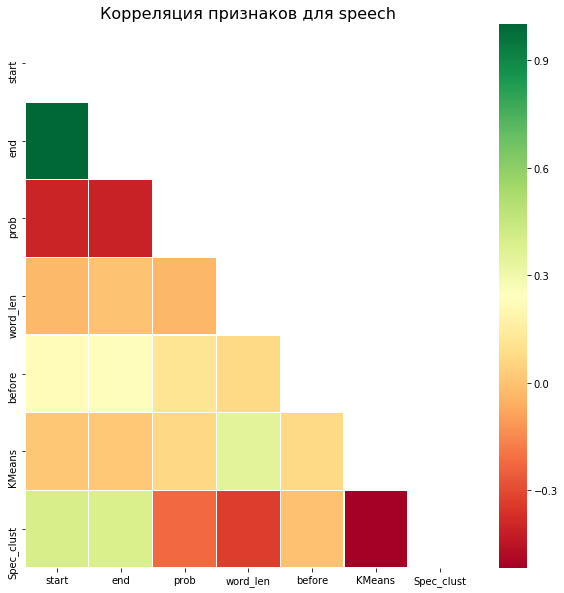

In [35]:
# корреляционная матрица для speech
corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
plt.title('Корреляция признаков для speech', fontsize=16)
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

In [36]:
corr

,start,end,prob,word_len,before,KMeans,Spec_clust
start,1.000000,0.999543,-0.402301,-0.028270,0.228062,0.012380,0.396424
end,0.999543,1.000000,-0.403486,0.001976,0.230412,0.022934,0.386686
prob,-0.402301,-0.403486,1.000000,-0.033862,0.114028,0.068833,-0.222301
word_len,-0.028270,0.001976,-0.033862,1.000000,0.074681,0.348658,-0.327051
before,0.228062,0.230412,0.114028,0.074681,1.000000,0.071929,-0.004489
KMeans,0.012380,0.022934,0.068833,0.348658,0.071929,1.000000,-0.515878
Spec_clust,0.396424,0.386686,-0.222301,-0.327051,-0.004489,-0.515878,1.000000


***
## Бонусный блок  
Используя некоторый чит (ествественный интеллект) и разбив news на реальные кластеры самостоятельно, я получил ярко выраженную линейную корреляцию между показателем END и результатом.
***

C:\Users\knigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


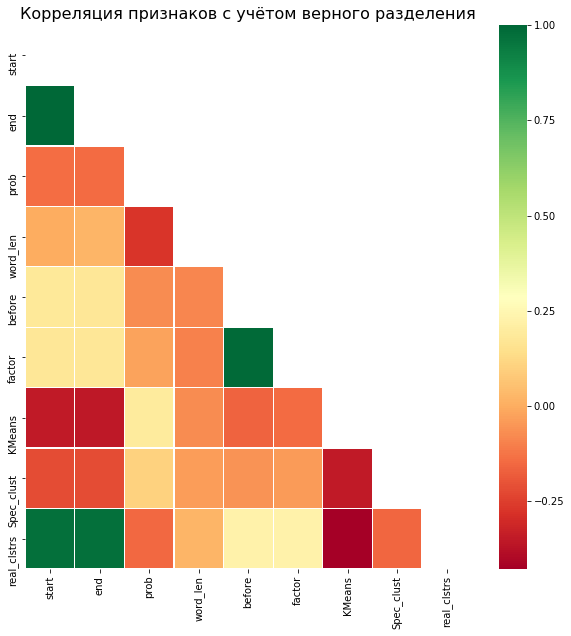

In [37]:
news['real_clstrs'] = 0
true_first = [0, 8, 25, 34, 42]
r = 0
for i in range(news.shape[0]):
    news['real_clstrs'][i] = r
    if i+1 in set(true_first):
        r += 1
corr = news.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
plt.title('Корреляция признаков с учётом верного разделения', fontsize=16)
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

In [38]:
# наиболее крупные по значению коэффициенты корреляции (с реальными кластерами)
corr.real_clstrs.abs().sort_values(ascending = False)

real_clstrs    1.000000
end            0.977459
start          0.977209
KMeans         0.428202
before         0.229921
factor         0.227454
Spec_clust     0.157375
prob           0.151203
word_len       0.020235
Name: real_clstrs, dtype: float64

***
Это позволяет предположить, что использование любого алгоритма кластеризации, который переваривает метрику расстояний Махаланобиса (вместо типичного Евклидового расстояния), позволит крайне точно предсказывать кластеры и, соответственно, составлять предложения. Алгоритм GaussianMixture использует именно MahalanobisDistance в качестве метрики (можно, конечно, и DBSCAN, но там потребуется дополнительная настройка ещё пары гиперпараметров, что, в черновом варианте моего кода, вышло не слишком очевидно). Посмотрим, как это работает в случае speech.
***

Число кластеров равно 7.


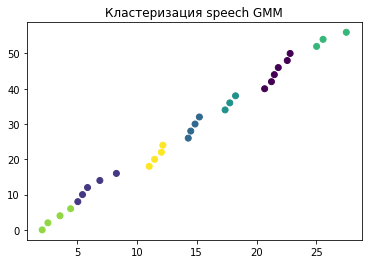

Gaussian Mixture


['Доброе утро московское время.',
 '8 часов утра 28 минут.',
 'Я собираюсь на работу.',
 'На улице сегодня обещают.',
 'Очень жаркую погоду.',
 'Надеюсь что только кондиционер нас спасёт.',
 'Всем пока до свидания.']

In [39]:
n_clstrs = 7 # эмпирически подобранный параметр
X = speech.copy()
X_fit = X[['end']]
estimator = GaussianMixture(
    n_components = n_clstrs, covariance_type = 'full')
y_pred = estimator.fit_predict(X_fit)
X['Gauss_mixt'] = y_pred
plt.scatter(X.start, [2*i for i in range(X.shape[0])], c=y_pred)
plt.title('Кластеризация speech GMM')
print('Число кластеров равно {}.'.format(n_clstrs))
plt.show()
print('Gaussian Mixture')
sentence = [X.word[0].capitalize()]
phrase = []
for i in range(1, X.shape[0]):
    if X.Gauss_mixt[i] == X.Gauss_mixt[i-1]:
        sentence.append(X.word[i])
    else:
        sentence = ' '.join(word for word in sentence)
        phrase.append(sentence + '.')
        sentence = [X.word[i].capitalize()]
sentence = ' '.join(word for word in sentence)
phrase.append(sentence + '.')
phrase

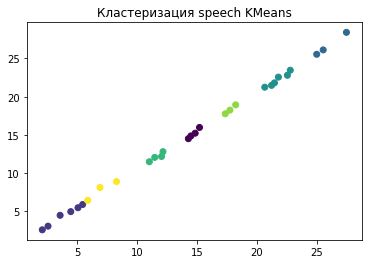

KMeans


['Доброе утро московское время 8 часов.',
 'Утра 28 минут.',
 'Я собираюсь на работу.',
 'На улице сегодня обещают.',
 'Очень жаркую погоду.',
 'Надеюсь что только кондиционер нас спасёт.',
 'Всем пока до свидания.']

In [40]:
estimator = KMeans(n_clusters = n_clstrs)
y_pred = estimator.fit_predict(X_fit)
X['KMeans'] = estimator.labels_
plt.scatter(X.start, X.end, c=y_pred)
plt.title('Кластеризация speech KMeans')
plt.show()
print('KMeans')
sentence = [X.word[0].capitalize()]
phrase = []
for i in range(1, X.shape[0]):
    if X.KMeans[i] == X.KMeans[i-1]:
        sentence.append(X.word[i])
    else:
        sentence = ' '.join(word for word in sentence)
        phrase.append(sentence + '.')
        sentence = [X.word[i].capitalize()]
sentence = ' '.join(word for word in sentence)
phrase.append(sentence + '.')
phrase

***
Видно, что в целом GaussianMixture составил предложения грамотнее (и при смене числа кластеров результаты как минимум не хуже, чем в KMeans), однако, как сказано в начале бонусного блока, обстоятельства для применения расстояний Махаланобиса были выяснены нечестным образом (как я понимаю, задание не предполагало участие естественного интеллекта для размечивания кластеров и своеобразного перехода к обучению с учителем), поэтому я не использовал эту методику как основную.
***
## Вывод  
В качестве вывода можно отметить, что KMeans справляется лучше с задачей разделения небольших текстов. Также я довольно плохо использовал величину вероятности, так как она является не слишком очевидной. Использование же Gaussian Mixture может быть достаточно верным в данной выборке, но не самым лучшим в иных случаях (что отчасти напоминает переобучение).